# ADA 2018 -  Music, from 90's to Milenials

#### Andres Montero, Ariel Alba, Diego Iriarte




Have you ever wondered how did music evolve in the last years? Today with the explosion of the internet, music Services as Apple Music, Spotify, Tidal and other apps and platforms; it has become easier to obtain and share music. This project aims to find the evolution of music since 1990's, evaluate the key features of the tracks, such as energy, valence and danceability. We want to show how and what was the most popular genre in the last years, the most popular song, the most important artist and what were the trends of the key features of these hits.

For this purpose, we'll work with two datasets:

* FMA: A Dataset For Music Analysis
* Our crawled dataset created using Spotify and LastFM API



In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import os.path
import ast
import seaborn as sns
import os
import sys
import matplotlib
import urllib, base64

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

from helpers import *
from datetime import datetime, date, time
from scipy import stats

%load_ext autoreload
%autoreload 2


In [2]:
# Constants
DATA_DIR = '../data/'
MUSIC_DIR = '{dir}{file}/'.format(dir=DATA_DIR, 
                                  file='fma_metadata')
PKL_DIR = '{dir}{file}/'.format(dir=DATA_DIR, 
                               file='pkl')
DEBUG = True


In [3]:
# Read  and wirte files depending on the existance of own path
genres_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='genres_df.pkl')
albums_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='albums_df.pkl')
artists_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='artists_df.pkl')
tracks_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                      file='tracks_df.pkl')
track_genre_rel_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                               file='track_genre_rel_df.pkl')
if os.path.exists(genres_df_path):
    genres_df = pd.read_pickle(genres_df_path)
else:
    print('There is no genres pandas data')
    
if os.path.exists(albums_df_path):
    albums_df = pd.read_pickle(albums_df_path)
else:
    print('There is no albums pandas data')
    
if os.path.exists(artists_df_path):
    artists_df = pd.read_pickle(artists_df_path)
else:
    print('There is no artists pandas data')
    
if os.path.exists(tracks_df_path):
    tracks_df = pd.read_pickle(tracks_df_path)
else:
    print('There is no tracks pandas data')
    
if os.path.exists(track_genre_rel_df_path):
    track_genre_rel_df = pd.read_pickle(track_genre_rel_df_path)
else:
    print('There is no tracks-genres pandas data')
    

In [4]:
pretty_print(genres_df, 'Genres', True)
pretty_print(artists_df, 'Artists', True)
pretty_print(albums_df, 'Albums', True)
pretty_print(tracks_df, 'Tracks', True)
pretty_print(track_genre_rel_df, 'Track-Genre', True)


Genres size: 163

NaN count by column:
genre_id        0
#tracks         0
parent          0
title           0
top_level       0
genre_parent    0
dtype: int64


,genre_id,#tracks,parent,title,top_level,genre_parent
0,1,8693,38,Avant-Garde,38,Experimental
1,2,5271,0,International,2,International
2,3,1752,0,Blues,3,Blues
3,4,4126,0,Jazz,4,Jazz
4,5,4106,0,Classical,5,Classical


Artists size: 21966

NaN count by column:
artist_id               0
artist_discovery    19090
city                18130
state               18130
country             18130
artist_family       19090
artist_hotness      13465
artist_latitude     18130
artist_longitude    18130
artist_name             0
dtype: int64


,artist_id,artist_discovery,city,state,country,artist_family,artist_hotness,artist_latitude,artist_longitude,artist_name
0,1,0.388990,Lakehurst,New Jersey,US,0.38674,0.40637,40.0583,-74.4057,AWOL
1,6,0.557339,NaN,NaN,NaN,0.614272,0.798387,NaN,NaN,Kurt Vile
2,54,0.388923,Providence,Rhode Island,US,0.330784,0.4063,41.824,-71.4128,Alec K. Redfearn & the Eyesores
3,56,0.252381,Providence,Rhode Island,US,0.238153,0.263657,41.824,-71.4128,Amoebic Ensemble
4,60,0.262717,Philadelphia,Pennsylvania,US,0.173315,0.274455,39.9523,-75.1638,Arc and Sender


Albums size: 19621

NaN count by column:
album_id                  0
album_date_created     5226
album_date_released    5404
album_title               1
album_listens            28
dtype: int64


,album_id,album_date_created,album_date_released,album_title,album_listens
0,1,2008-11-26 01:44:45,2009-01-05,AWOL - A Way Of Life,6073.0
1,6,2008-11-26 01:45:08,2008-02-06,Constant Hitmaker,47632.0
2,60,2008-11-26 01:49:57,2009-01-16,Every Man For Himself,1304.0
3,61,2008-11-26 01:49:59,2007-05-22,The Blind Spot,1300.0
4,62,2008-11-26 01:50:03,2005-01-25,The Quiet Room,845.0


Tracks size: 285159

NaN count by column:
track_id               0
track_title            1
track_duration         0
artist_id              0
album_id               0
track_language    270135
track_listens      14380
track_tags             0
danceability       93445
energy             93445
valence            93445
song_currency     272030
song_hotness       93445
dtype: int64


,track_id,track_title,track_duration,artist_id,album_id,track_language,track_listens,track_tags,danceability,energy,valence,song_currency,song_hotness
0,2,Food,168.0,1,1,en,1293.0,[],0.675894,0.634476,0.576661,0.000000,0.000000
1,3,Electric Ave,237.0,1,1,en,514.0,[],0.528643,0.817461,0.269240,0.000000,0.000000
2,5,This World,206.0,1,1,en,1151.0,[],0.745566,0.701470,0.621661,0.000000,0.000000
3,10,Freeway,161.0,6,6,en,50135.0,[],0.658179,0.924525,0.963590,0.005158,0.354516
4,134,Street Music,207.0,1,1,en,943.0,[],0.513238,0.560410,0.894072,0.000000,0.000000


Track-Genre size: 288108

NaN count by column:
track_id    0
genre_id    0
dtype: int64


,track_id,genre_id
0,2,21
1,3,21
2,5,21
3,10,10
4,20,76


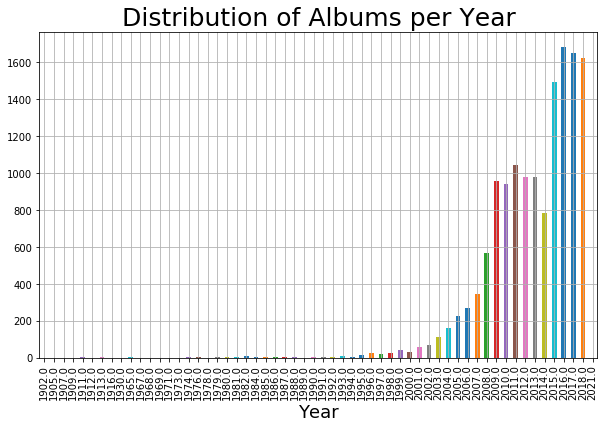

In [5]:
album_dist = albums_df.groupby(albums_df['album_date_released'].dt.year).size()

def dist_album_year():
    album_dist.plot(kind='bar')
    plt.grid()
    plt.xticks(rotation=90)

std_plot(dist_album_year, title='Distribution of Albums per Year',
         xlabel='Year')


In [6]:
start_date=pd.Timestamp(2000, 1, 1, 0)
end_date=pd.Timestamp(2018,12,12,23)
album_filtered = albums_df[(albums_df.album_date_released > start_date) & (albums_df.album_date_released < end_date ) ]


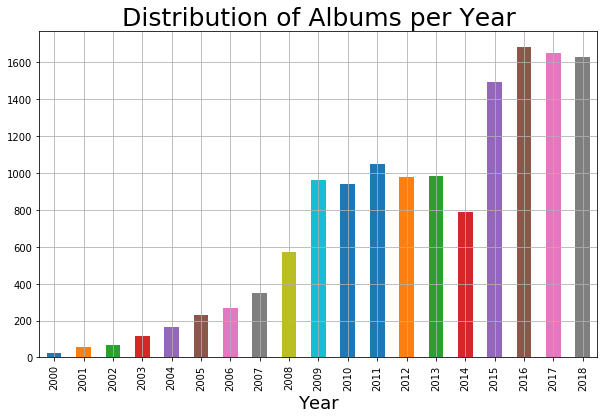

In [7]:
album_dist = album_filtered.groupby(album_filtered['album_date_released'].dt.year).size()

def dist_album_year():
    album_dist.plot(kind='bar')
    plt.grid()
    plt.xticks(rotation=90)

std_plot(dist_album_year, title='Distribution of Albums per Year',
         xlabel='Year')

In the previous picture we can see the production of albums per year grows exponentialy.

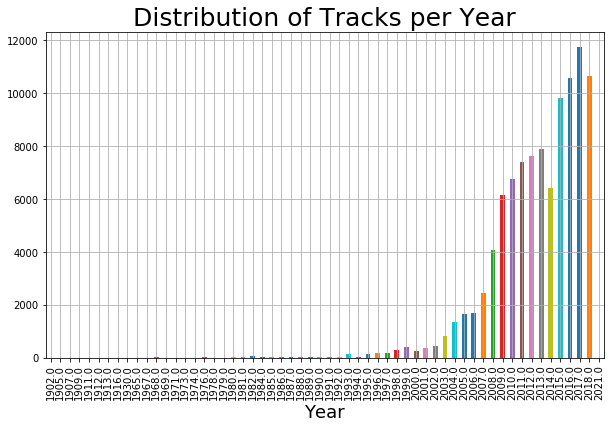

In [8]:
tracks_albums = tracks_df.merge(albums_df)
tracks_dist = tracks_albums.groupby(tracks_albums['album_date_released'].dt.year).size()

def dist_tracks_year():
    tracks_dist.plot(kind='bar')
    plt.grid()
    plt.xticks(rotation=90)

std_plot(dist_tracks_year, title='Distribution of Tracks per Year',
         xlabel='Year')


In [9]:
tracks_filtered = tracks_albums[(tracks_albums.album_date_released > start_date) & (tracks_albums.album_date_released < end_date ) ]

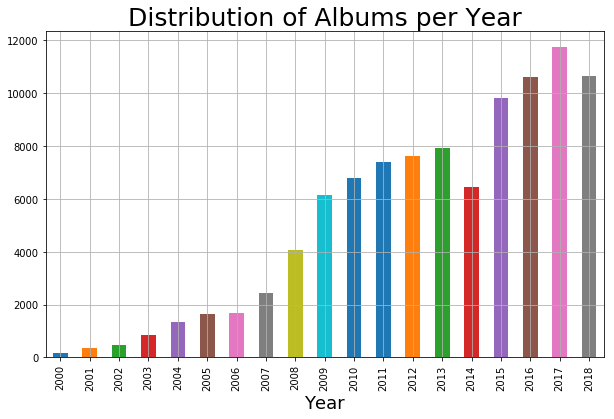

In [10]:
album_dist = tracks_filtered.groupby(tracks_filtered['album_date_released'].dt.year).size()

def dist_album_year():
    album_dist.plot(kind='bar')
    plt.grid()
    plt.xticks(rotation=90)

std_plot(dist_album_year, title='Distribution of Albums per Year',
         xlabel='Year')

And like in the previous picture since the albums grow exponentialy the tracks follow the same pattern.

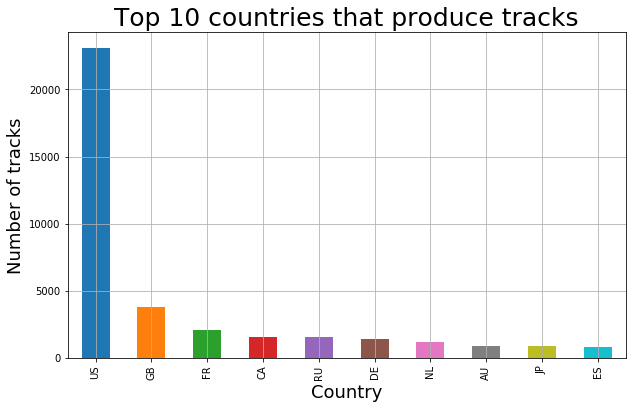

In [11]:
track_artist = tracks_df.merge(artists_df, left_on='artist_id', 
                               right_on='artist_id')
country_grouped = track_artist.groupby(track_artist['country']).size()
country_top10 = country_grouped.sort_values(ascending=False) \
                                     .head(10)

def country_track_top10():
    country_top10.plot(kind='bar')
    plt.ylabel('Number of Tracks')
    plt.grid()
    
std_plot(country_track_top10, title='Top 10 countries that produce tracks',
         ylabel='Number of tracks', xlabel='Country')


We can observe that the top country producing tracks is the US, with a substancial difference comparing 20000 to 5000 with the next country Great Britain.

#### Top 10 albums

C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


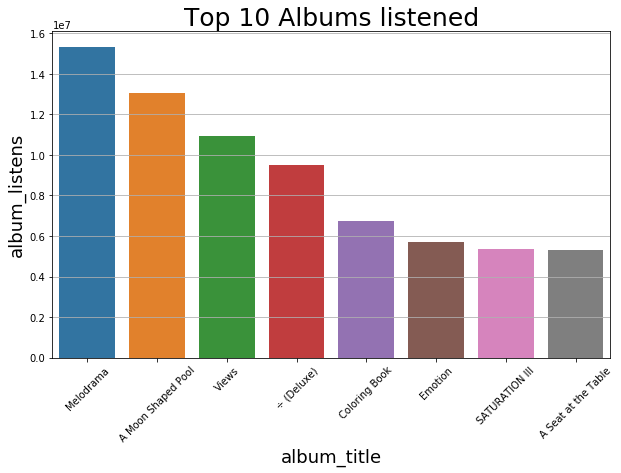

In [12]:
albums_grouped = albums_df.groupby(albums_df['album_id']) \
                          .first()[['album_title', 'album_listens']]
albums_top10 = albums_grouped.sort_values(by='album_listens', 
                                          ascending=False).head(10)

def album_listen_top10():
    plt.grid()
    sns.barplot(x='album_title', y='album_listens',
                data=albums_top10)
    plt.xticks(rotation=45)
    
std_plot(album_listen_top10, title='Top 10 Albums listened')


#### Top 10 Tracks

C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


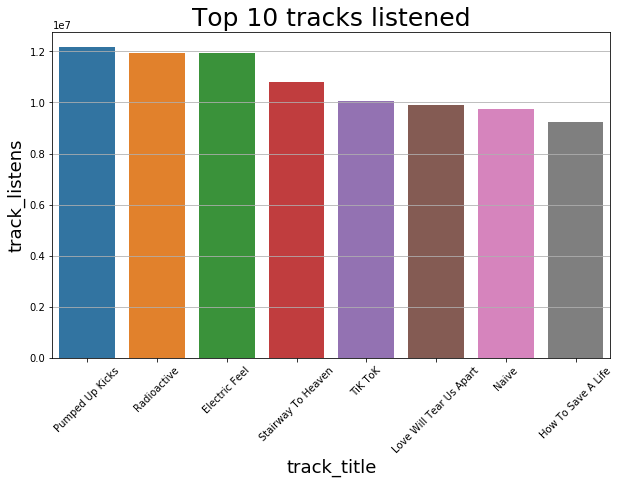

In [13]:
tracks_grouped = tracks_df.groupby(tracks_df['track_id']) \
                          .first()[['track_title', 'track_listens']]
tracks_top10 = tracks_grouped.sort_values(by='track_listens', 
                                          ascending=False).head(10)

def track_listen_top10():
    plt.grid()
    sns.barplot(x='track_title', y= 'track_listens',
                data=tracks_top10)
    plt.xticks(rotation=45)
    
std_plot(track_listen_top10, title='Top 10 tracks listened')


#### Relation between danceability and duration of the song

In [14]:
tracks_df.insert(loc=13, column='track_duration_minutes',
                 value=(tracks_df['track_duration'] / 60))

tracks_df['track_duration_minutes'] = pd.to_numeric( \
                                            tracks_df['track_duration_minutes'])


C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


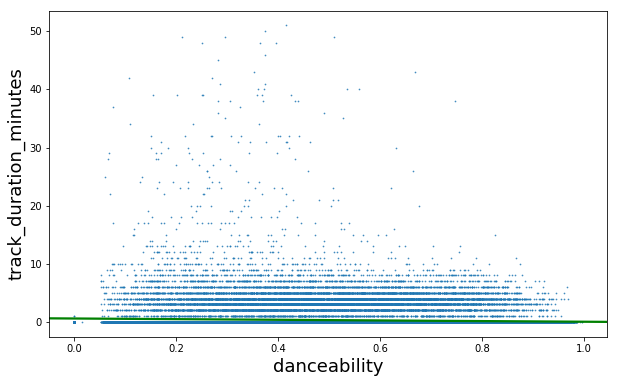

In [15]:
tracks_df['track_duration_minutes'] = tracks_df['track_duration_minutes'] \
                                                .apply(lambda x : np.rint(x))

def danceability_track_duration():
    sns.regplot(x='danceability', y='track_duration_minutes',
                data=tracks_df, ci=95, 
                line_kws = {'color': 'green'},
                scatter_kws={'s': 0.5})
    
std_plot(danceability_track_duration)


In [16]:
tracks_df_correlation = tracks_df.dropna()
spearman_coeff = stats.spearmanr(tracks_df_correlation['danceability'], 
                                 tracks_df_correlation['track_duration_minutes'])
print('The spearman correlation is: {}'.format(spearman_coeff))


The spearman correlation is: SpearmanrResult(correlation=-0.03915727479024427, pvalue=0.0028031306518225274)


In [17]:
pearson_coeff = stats.pearsonr(tracks_df_correlation['danceability'], 
                                 tracks_df_correlation['track_duration_minutes'])
print('The pearson correlation is: {}'.format(pearson_coeff))

The pearson correlation is: (-0.11209761784908044, 9.551426265293523e-18)


###### With the previous results of the Spearman and Pearson coefficients, we conclude that there is no direct strong correlation between the duration of the tracks with the danceability


## Relation between valence and other variables

Valence refers to the degree of positive or negative emotions one perceives from a song. We'll try to find some relations between such varible and others.
Relation between track_listens and valence

C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


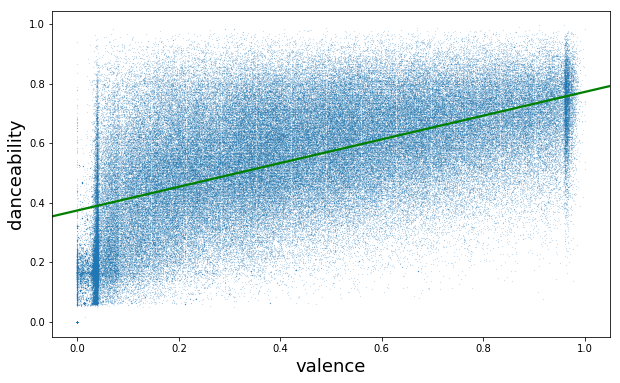

In [18]:
def danceability_valence():
    sns.regplot(x='valence', y='danceability',
                data=tracks_df, ci=95, 
                line_kws = {'color': 'green'},
                scatter_kws={'s': 0.01})
    
std_plot(danceability_valence)


In [19]:
spearman_coeff = stats.spearmanr(tracks_df_correlation['valence'], 
                                 tracks_df_correlation['danceability'])
print('The spearman correlation is: {}'.format(spearman_coeff))


The spearman correlation is: SpearmanrResult(correlation=0.46902453256229065, pvalue=0.0)


In [20]:
pearson_coeff = stats.pearsonr(tracks_df_correlation['valence'], 
                                 tracks_df_correlation['danceability'])
print('The pearson correlation is: {}'.format(pearson_coeff))

The pearson correlation is: (0.46448452367328236, 1.4748052717304e-309)


###### With the previous results of the Spearman and Pearson coefficients, we conclude that there is moderate correlation between the valence and the danceability of a track

C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


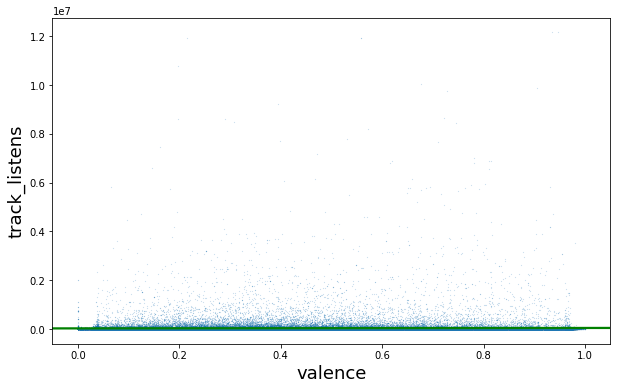

In [21]:
def track_listen_valence():
    sns.regplot(x='valence', y='track_listens',
                data=tracks_df, ci=95, 
                line_kws ={'color': 'green'}, 
                scatter_kws={'s': 0.01})
    
std_plot(track_listen_valence)


#### As seen in the plot, it is difficult to find a relationships between the valence of the song and the number of listens.

## Top tracks/genres

Mean value of valence per genre

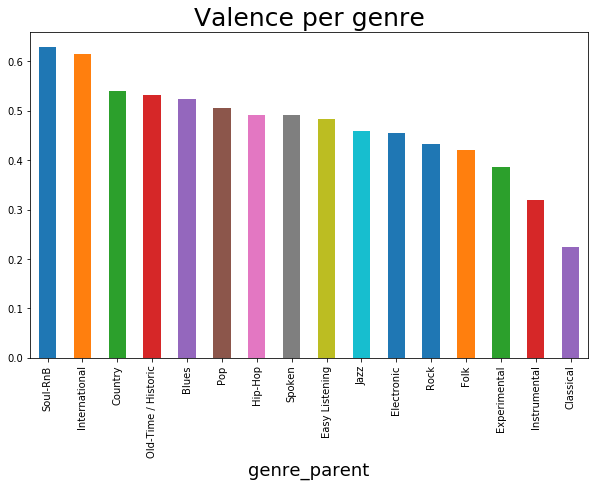

In [22]:
track_rel = tracks_df.merge(track_genre_rel_df)
track_genre = track_rel.merge(genres_df)
genre_valence = track_genre.groupby('genre_parent')['valence'].mean()

top10_genre_valence = genre_valence.sort_values(ascending=False)

def genre_valence_top10():
    top10_genre_valence.plot(kind='bar')
       
std_plot(genre_valence_top10, title='Valence per genre')

We can observe that the genre with the highest valence is country & wester

In [23]:
track_genre_album = track_genre.merge(albums_df)

genre_year = track_genre_album[['genre_parent', 'album_date_released']]
genre_year.insert(loc=2, column='album_released_year',
                  value=(genre_year['album_date_released'].dt.year))


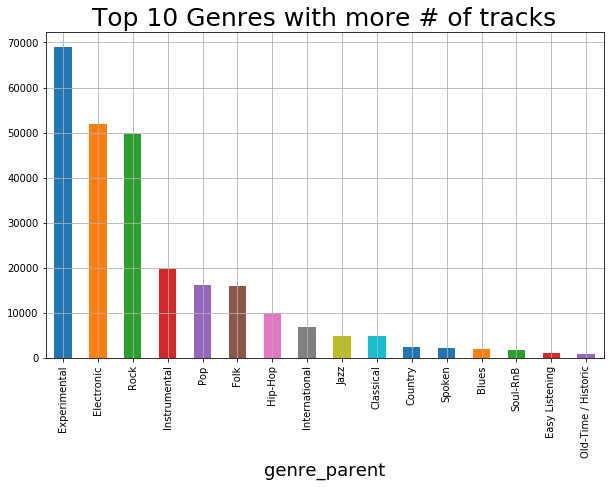

In [24]:
top_genre = genre_year.groupby(genre_year['genre_parent']).size()
top_genre_sorted = top_genre.sort_values(ascending=False)

def genres_num_track_top10():
    top_genre_sorted.plot(kind='bar')
    plt.grid()

std_plot(genres_num_track_top10,
         title='Top 10 Genres with more # of tracks')

We can observe that the genre with the highest number of tracks is experimental followed closely by electronic

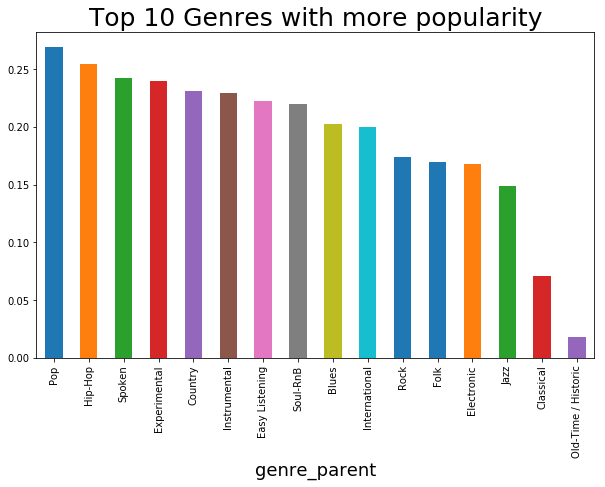

In [25]:
# Top Genres with more popularity
genre_popularity = track_genre.groupby('genre_parent')['song_hotness'].mean()
top10_genre_popularity = genre_popularity.sort_values(ascending=False)

def genre_popularity_top10():
    top10_genre_popularity.plot(kind='bar')
    
std_plot(genre_popularity_top10, 
         title='Top 10 Genres with more popularity')


We can observe that the most popular genre is rap

# TOP ARTIST THROUGHT YEARS SINCE 2000

<Figure size 720x432 with 0 Axes>

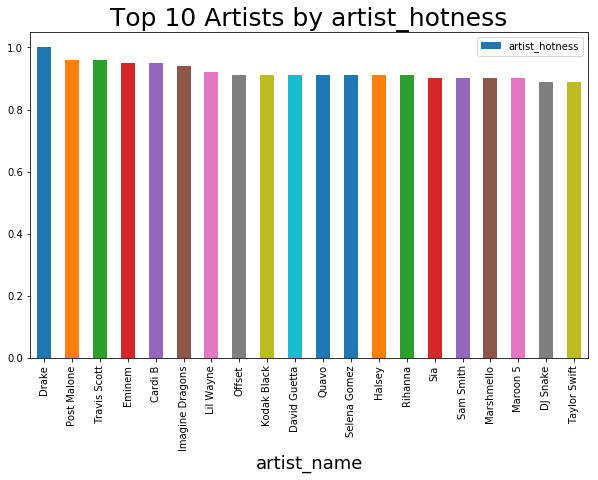

In [26]:
# Top 10 artists by artists_hotness
top10_artists = artists_df[['artist_name', 'artist_hotness']] \
                    .sort_values(by='artist_hotness',
                                 ascending=False).head(20)

def artists_top10():
    return top10_artists.plot(x='artist_name', y='artist_hotness',
                              kind='bar')
    
std_plot(artists_top10, title='Top 10 Artists by artist_hotness')


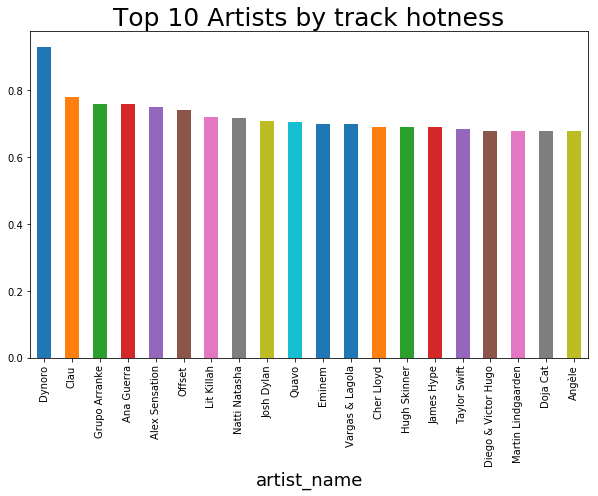

In [27]:
# Top 10 artists by tracks popularity
track_artist = tracks_df.merge(artists_df)
track_hotness_artist = track_artist.groupby('artist_name')['song_hotness'].mean()
top10_artists = track_hotness_artist.sort_values(ascending=False).head(20)

def artists_top10():
    top10_artists.plot(kind='bar')
    
std_plot(artists_top10, title='Top 10 Artists by track hotness')


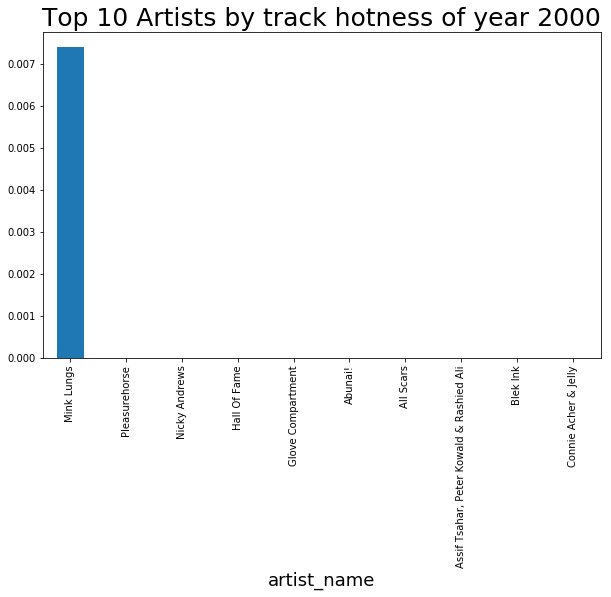

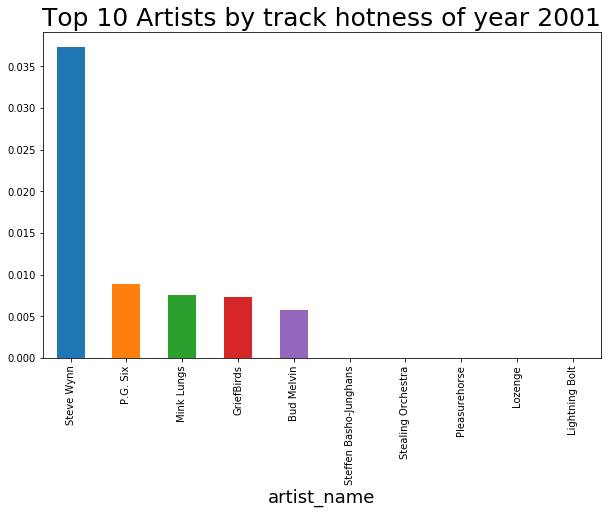

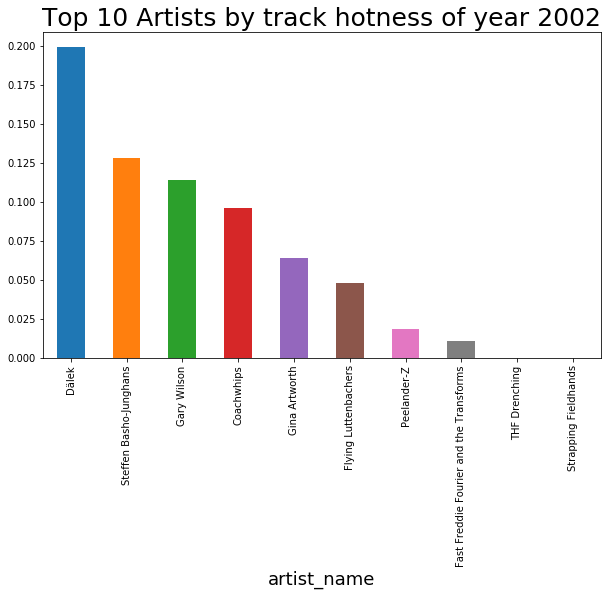

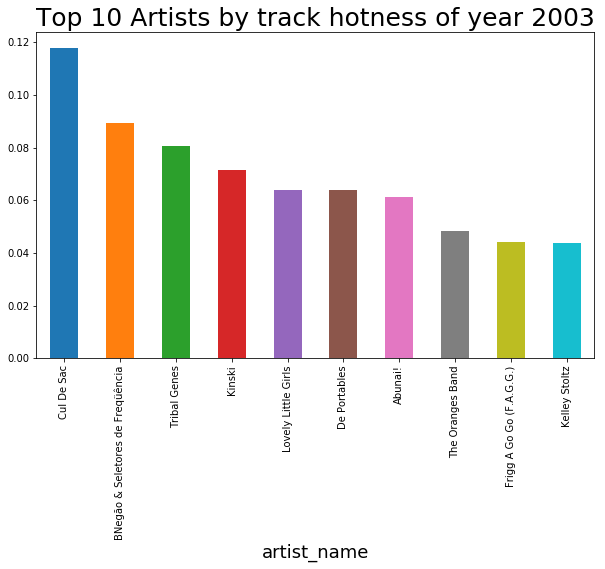

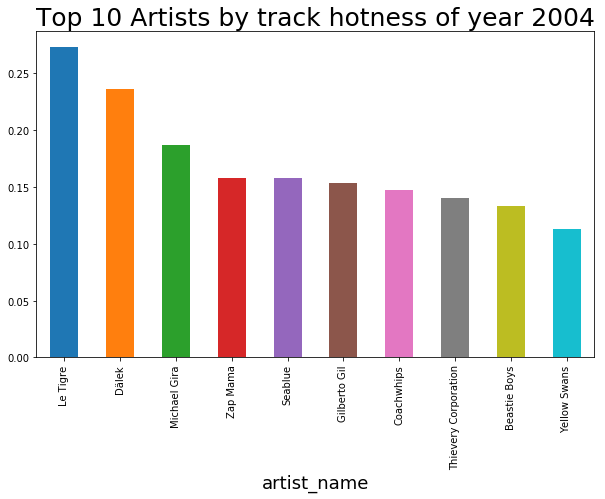

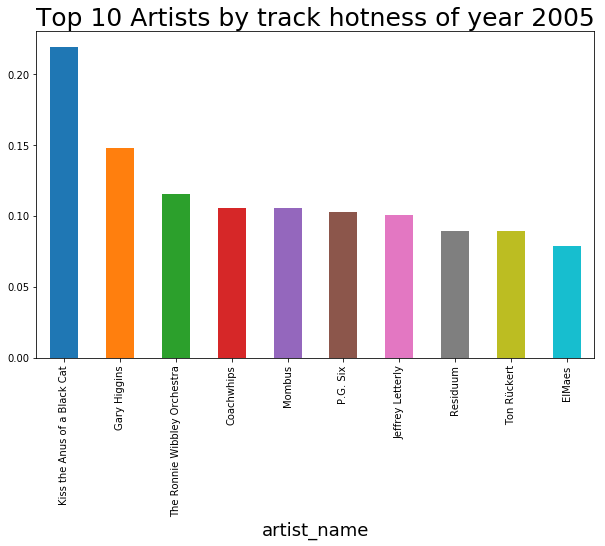

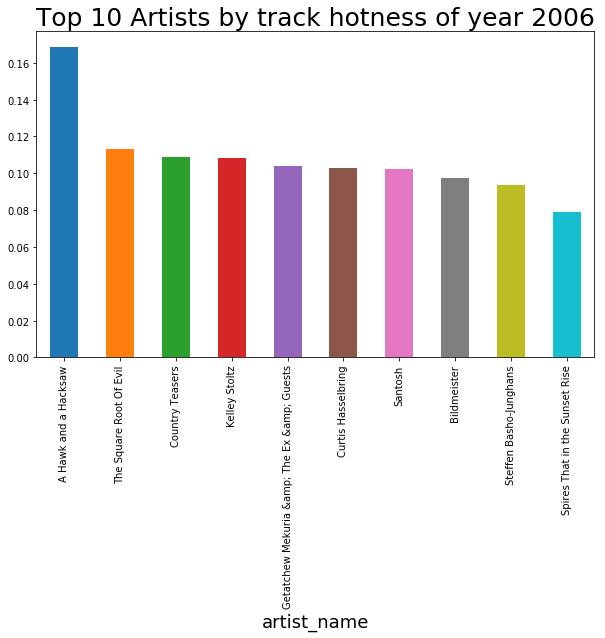

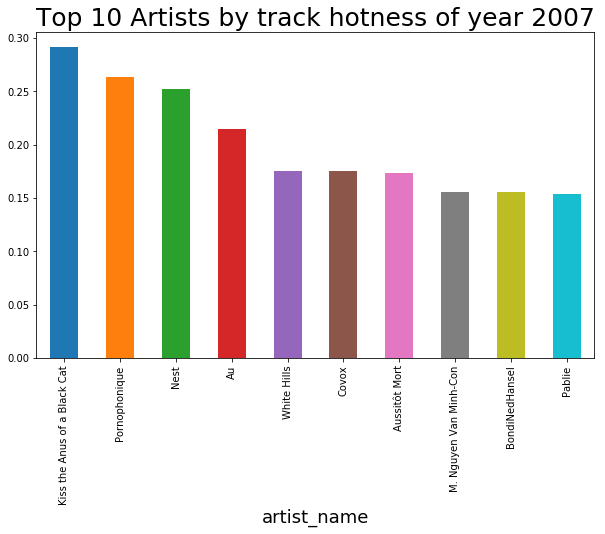

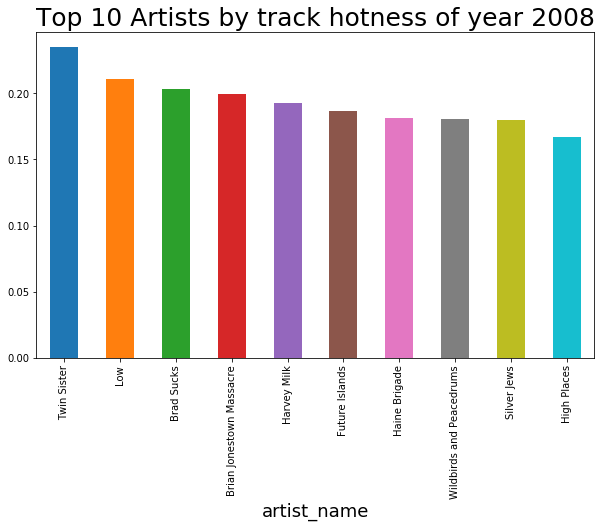

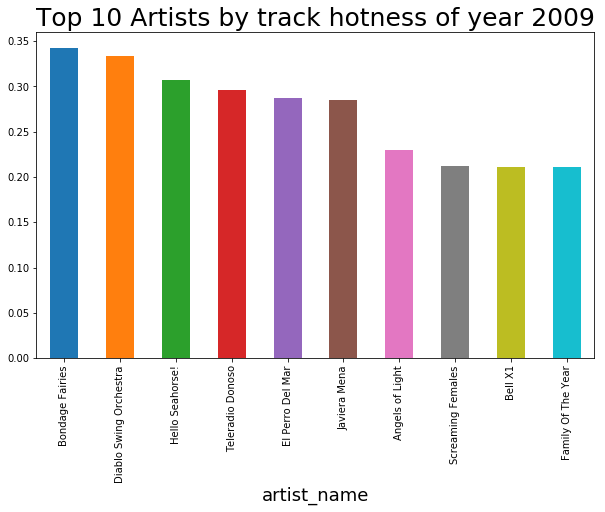

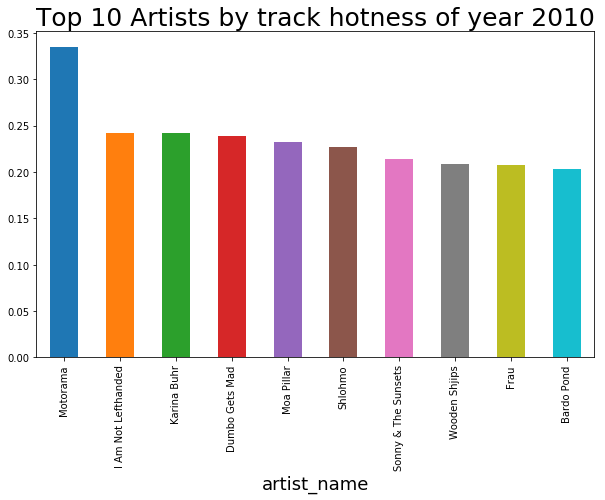

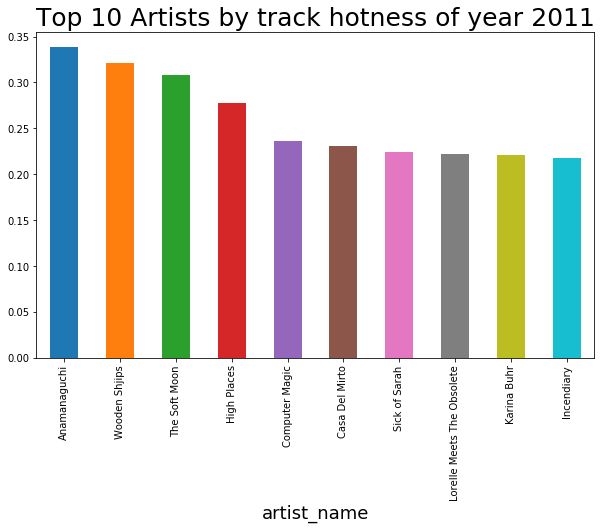

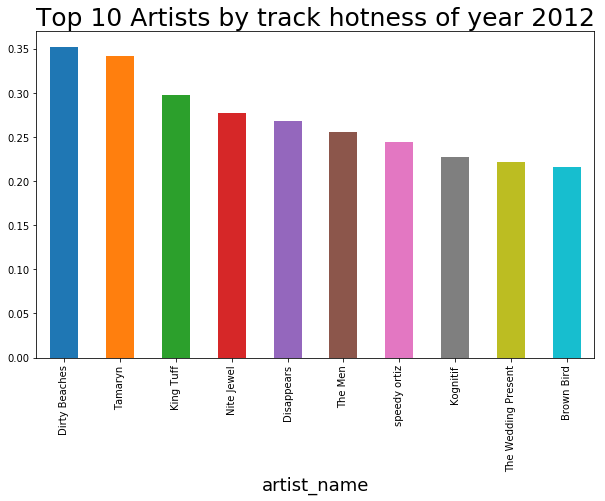

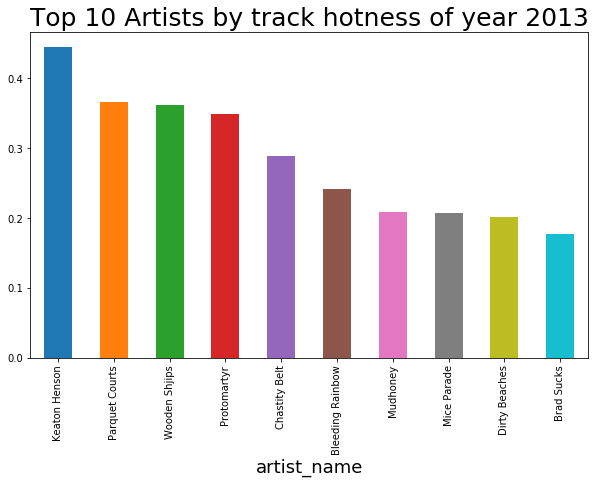

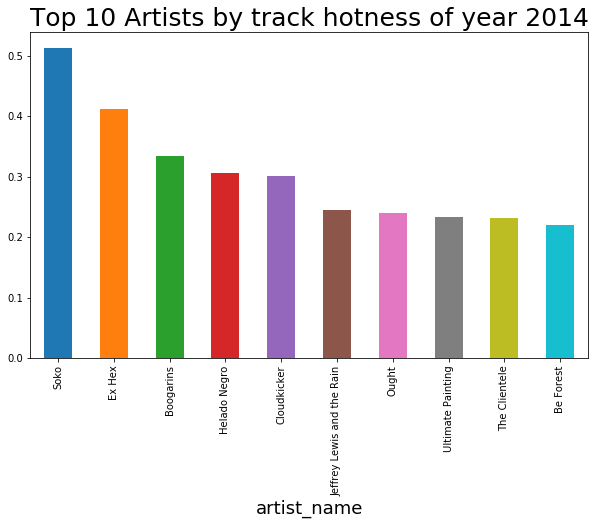

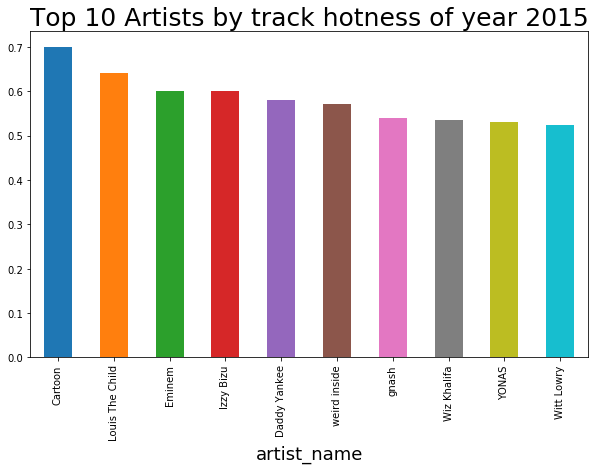

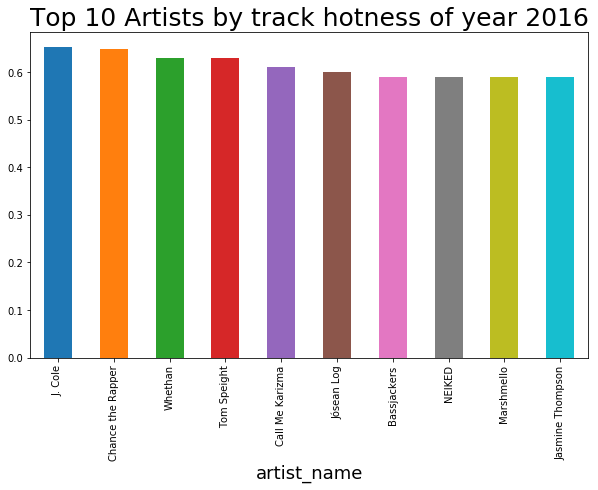

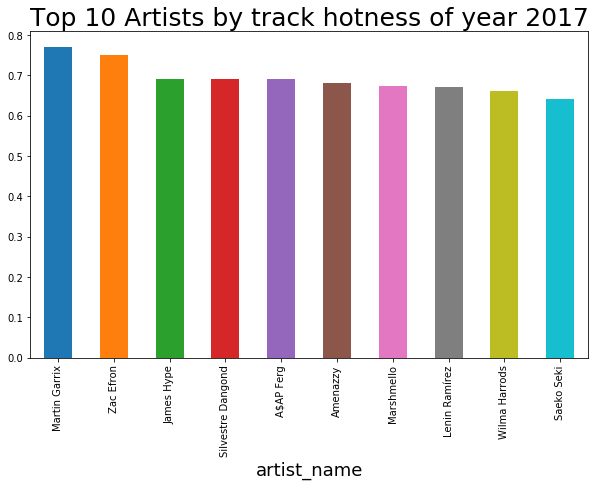

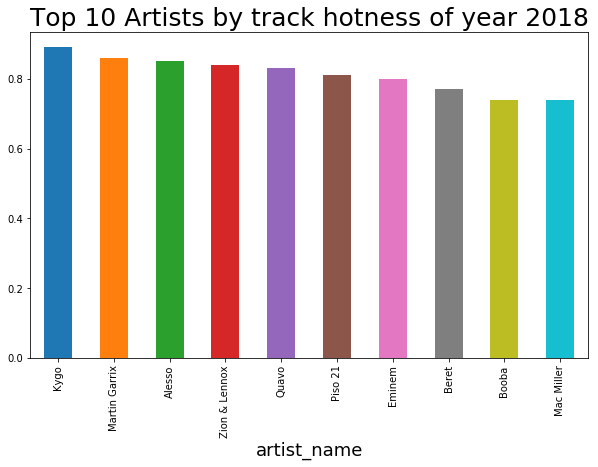

In [28]:
# Top Artists Evolution since 2000 by year
tracks_albums_artists = tracks_df.merge(albums_df).merge(artists_df)

for year in range(2000, 2019):
    is_from_year = tracks_albums_artists['album_date_released'].dt.year == year
    filter_tracks = tracks_albums_artists[is_from_year]
    
    track_hotness_artist = filter_tracks.groupby('artist_name')['song_hotness'].mean()
    top10_artists = track_hotness_artist.sort_values(ascending=False).head(10)

    def artists_top10():
        top10_artists.plot(kind='bar')

    std_plot(artists_top10, title='Top 10 Artists by track hotness of year {}'.format(year))
    

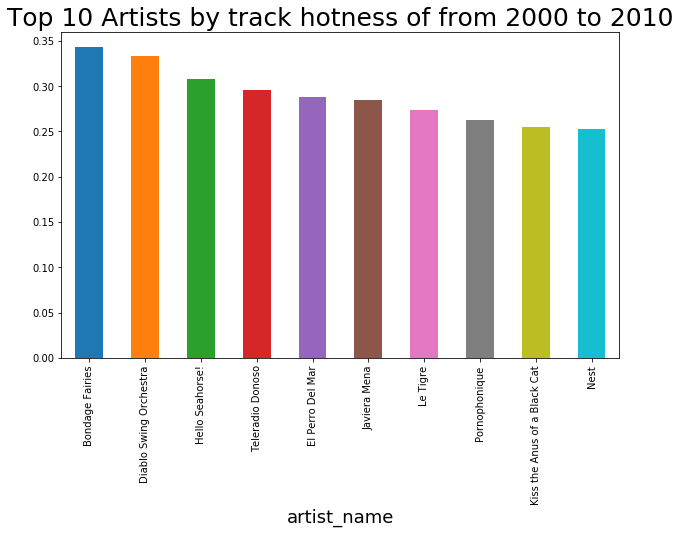

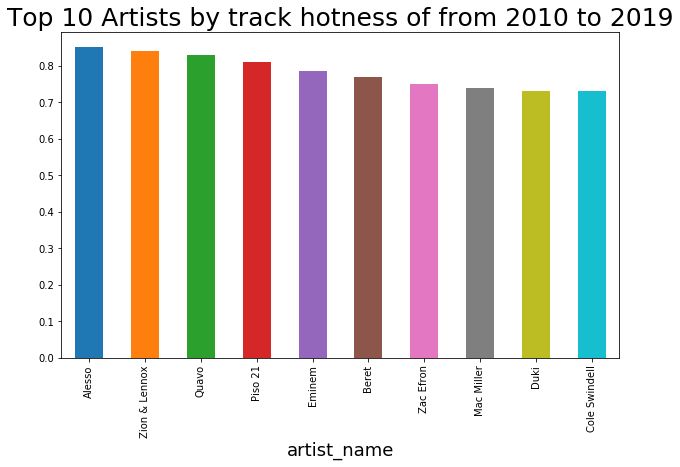

In [29]:
# Top Artists Evolution since 2000 by year interval
interval_y = [(2000, 2010), (2010, 2019)]

for from_y, to_y in interval_y:
    album_released_year = tracks_albums_artists['album_date_released'].dt.year
    from_y_cond =  album_released_year >= from_y
    to_y_cond = album_released_year < to_y
    is_from_to_y = from_y_cond & to_y_cond
    filter_tracks = tracks_albums_artists[is_from_to_y]
    
    track_hotness_artist = filter_tracks.groupby('artist_name')['song_hotness'].mean()
    top10_artists = track_hotness_artist.sort_values(ascending=False).head(10)

    def artists_top10():
        top10_artists.plot(kind='bar')

    std_plot(artists_top10, 
             title='Top 10 Artists by track hotness of from {from_y} to {to_y}'.format(from_y=from_y,
                                                                                       to_y=to_y))

## Evolution of music Valence/Energy/Danceability

In [30]:
tracks_albums = tracks_df.merge(albums_df, how='inner')
### Hay algunos track IDs que tienen mal el formato
tracks_albums.tail()

,track_id,track_title,track_duration,artist_id,album_id,track_language,track_listens,track_tags,danceability,energy,valence,song_currency,song_hotness,track_duration_minutes,album_date_created,album_date_released,album_title,album_listens
136266,6oqxwrZCyp47aGRqzwGVHH,You and Me - Instrumental,3.351100,4hf2dZmXqgZML1pmYbvf4y,6vnj3ZcnPYo3ks0bCgz2Eh,NaN,384.0,[],0.518,0.286,0.504,NaN,0.43,0.0,NaN,2018-05-31,You and Me (Instrumental),381.0
136267,7FFfYM4JE1vj5n4rhHxg8q,Babe (feat. Taylor Swift),3.585100,0hYxQe3AK5jBPCr5MumLHD,6tnr0khD5AaIXzNbmqHsKx,NaN,67768.0,"[country, pop, female vocalists, country pop, ...",0.535,0.777,0.664,NaN,0.58,0.0,NaN,2018-04-20,Babe (feat. Taylor Swift),34178.0
136268,29nmbfUQdC3fWijaMFzyB8,"Alone with You, Pt. 2",3.043683,4QDvXnbmw1znkqkK1119Fc,0YVJVDutUv0EVeoW1xYJqK,NaN,3444.0,[],0.491,0.666,0.596,NaN,0.52,0.0,NaN,2018-10-04,"Alone with You, Pt. 2",3244.0
136269,3fyx5Gt2ikkQqQ5PzsG0zi,Balance,3.109833,2e4G04F77jxVuDYo44TCSm,3SfUy3CFyfEXkAOqfaBSmp,NaN,2112.0,[],0.794,0.495,0.698,NaN,0.49,0.0,NaN,2018-10-14,Balance,2107.0
136270,69R5KIK7F223ELnpIzQ86l,Not Human,3.323100,4fvBJY4JqprqAOrvEu6aAY,7n8qrgYKwQodBoogR4OkOJ,NaN,6608.0,"[electronic, electropop]",0.520,0.815,0.466,NaN,0.43,0.0,NaN,2018-02-28,Not Human,5722.0


In [31]:
tracks_albums_summer = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <9)]
tracks_albums_winter = tracks_albums.loc[lambda tracks_albums: ((tracks_albums.album_date_released.dt.month >11)\
                 | (tracks_albums.album_date_released.dt.month <3))]
tracks_albums_spring = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >2)\
                 & (tracks_albums.album_date_released.dt.month <6)]
tracks_albums_autumn = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >8)\
                 & (tracks_albums.album_date_released.dt.month <12)]


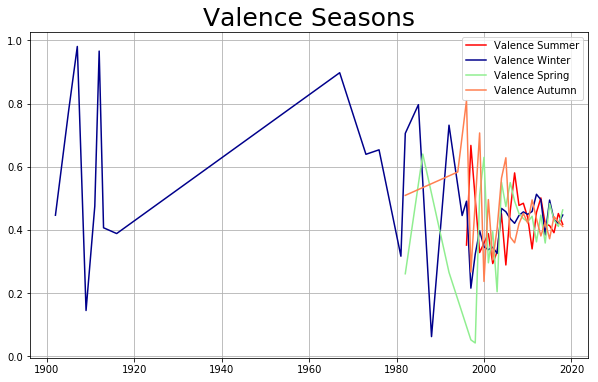

In [32]:
#summer
tracks_albums_summer_year = tracks_albums_summer.groupby([(tracks_albums_summer['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_summer['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_valence = tracks_albums_summer_year_mean[['valence']]

# winter

tracks_albums_winter_year = tracks_albums_winter.groupby([(tracks_albums_winter['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_winter['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_winter_year_mean = tracks_albums_winter_year.groupby('year').mean()
tracks_albums_winter_year_mean_valence = tracks_albums_winter_year_mean[['valence']]

#spring
tracks_albums_spring_year = tracks_albums_spring.groupby([(tracks_albums_spring['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_spring['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_spring_year_mean = tracks_albums_spring_year.groupby('year').mean()
tracks_albums_spring_year_mean_valence = tracks_albums_spring_year_mean[['valence']]

#autumn
tracks_albums_autumn_year = tracks_albums_autumn.groupby([(tracks_albums_autumn['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_autumn['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_autumn_year_mean = tracks_albums_autumn_year.groupby('year').mean()
tracks_albums_autumn_year_mean_valence = tracks_albums_autumn_year_mean[['valence']]

def valence_seasons():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_year_mean_valence["valence"],
                 color="red", label="Valence Summer")
    sns.lineplot(data=tracks_albums_winter_year_mean_valence["valence"], 
                 color="darkblue", label="Valence Winter")
    sns.lineplot(data=tracks_albums_spring_year_mean_valence["valence"], 
                 color="lightgreen", label="Valence Spring")
    return sns.lineplot(data=tracks_albums_autumn_year_mean_valence["valence"], 
                        color="coral", label="Valence Autumn")

std_plot(valence_seasons, title='Valence Seasons')


From the previous graphic we can observe that the valence of the music in general had a significant decrese, almost 50% since the 1990's to 2018.

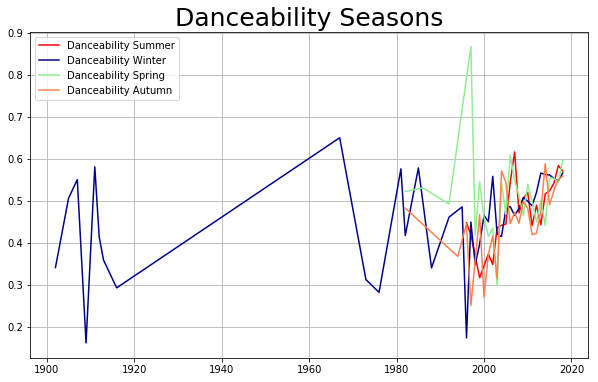

In [33]:
tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_danceability = tracks_albums_summer_year_mean[['danceability']]

tracks_albums_winter_year_mean = tracks_albums_winter_year.groupby('year').mean()
tracks_albums_winter_year_mean_danceability = tracks_albums_winter_year_mean[['danceability']]

tracks_albums_spring_year_mean = tracks_albums_spring_year.groupby('year').mean()
tracks_albums_spring_year_mean_danceability = tracks_albums_spring_year_mean[['danceability']]

tracks_albums_autumn_year_mean = tracks_albums_autumn_year.groupby('year').mean()
tracks_albums_autumn_year_mean_danceability = tracks_albums_autumn_year_mean[['danceability']]

def valence_seasons():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_year_mean_danceability["danceability"], 
                 color="red", label="Danceability Summer")
    sns.lineplot(data=tracks_albums_winter_year_mean_danceability["danceability"],
                 color="darkblue", label="Danceability Winter")
    sns.lineplot(data=tracks_albums_spring_year_mean_danceability["danceability"], 
                 color="lightgreen", label="Danceability Spring")
    return sns.lineplot(data=tracks_albums_autumn_year_mean_danceability["danceability"],
                        color="coral", label="Danceability Autumn")

std_plot(valence_seasons, title='Danceability Seasons')


From the previous graphic we can observe that the danceability of the music increased since the 1990's, with almost doubled value in 2018

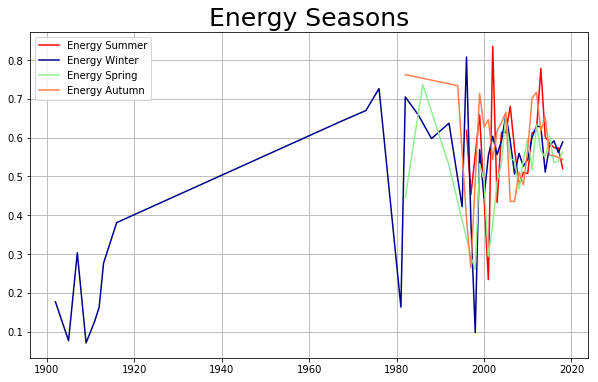

In [34]:
tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_energy = tracks_albums_summer_year_mean[['energy']]

tracks_albums_winter_year_mean = tracks_albums_winter_year.groupby('year').mean()
tracks_albums_winter_year_mean_energy = tracks_albums_winter_year_mean[['energy']]

tracks_albums_spring_year_mean = tracks_albums_spring_year.groupby('year').mean()
tracks_albums_spring_year_mean_energy = tracks_albums_spring_year_mean[['energy']]

tracks_albums_autumn_year_mean = tracks_albums_autumn_year.groupby('year').mean()
tracks_albums_autumn_year_mean_energy = tracks_albums_autumn_year_mean[['energy']]

def energy_seasons():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_year_mean_energy["energy"], 
                 color="red", label="Energy Summer")
    sns.lineplot(data=tracks_albums_winter_year_mean_energy["energy"],
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_year_mean_energy["energy"],
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_year_mean_energy["energy"],
                        color="coral", label="Energy Autumn")

std_plot(energy_seasons, title='Energy Seasons')


The highest period in terms of energy of the music is around 2003 with a value of almost 0.9, however this value decreased in the last years, with almost 0.6 in the last year.

## Evolution of music 2000-2010 Valence/Energy/Danceability Seasons

In [35]:
#sumer
tracks_albums_summer_2000 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <9) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)                           ]
tracks_albums_summer_2000_year = tracks_albums_summer_2000.groupby([(tracks_albums_summer_2000['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_summer_2000['album_date_released'].dt.month.rename('month'))]).mean()

#winter
tracks_albums_winter_2000 = tracks_albums.loc[lambda tracks_albums: ((tracks_albums.album_date_released.dt.month <3)\
                 | (tracks_albums.album_date_released.dt.month >11)) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)                           ]
tracks_albums_winter_2000_year = tracks_albums_winter_2000.groupby([(tracks_albums_winter_2000['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_winter_2000['album_date_released'].dt.month.rename('month'))]).mean()

#spring
tracks_albums_spring_2000 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >2)\
                 & (tracks_albums.album_date_released.dt.month <6) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)                           ]
tracks_albums_spring_2000_year = tracks_albums_spring_2000.groupby([(tracks_albums_spring_2000['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_spring_2000['album_date_released'].dt.month.rename('month'))]).mean()

#autumn
tracks_albums_autumn_2000 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >8)\
                 & (tracks_albums.album_date_released.dt.month <12) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)                           ]
tracks_albums_autumn_2000_year = tracks_albums_autumn_2000.groupby([(tracks_albums_autumn_2000['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_autumn_2000['album_date_released'].dt.month.rename('month'))]).mean()


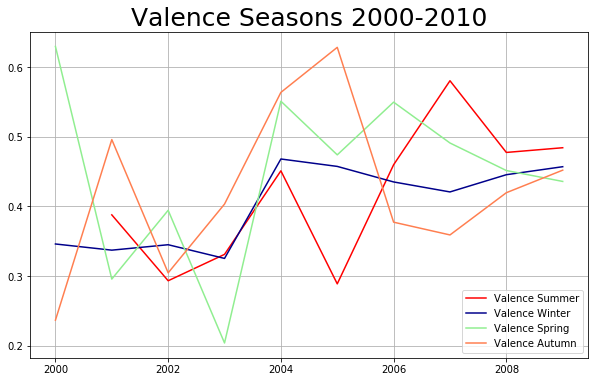

In [36]:
#summer
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('year').mean()
tracks_albums_summer_2000_year_mean_valence = tracks_albums_summer_2000_year_mean[['valence']]
#winter
tracks_albums_winter_2000_year_mean = tracks_albums_winter_2000_year.groupby('year').mean()
tracks_albums_winter_2000_year_mean_valence = tracks_albums_winter_2000_year_mean[['valence']]
#spring
tracks_albums_spring_2000_year_mean = tracks_albums_spring_2000_year.groupby('year').mean()
tracks_albums_spring_2000_year_mean_valence = tracks_albums_spring_2000_year_mean[['valence']]
#autumn
tracks_albums_autumn_2000_year_mean = tracks_albums_autumn_2000_year.groupby('year').mean()
tracks_albums_autumn_2000_year_mean_valence = tracks_albums_autumn_2000_year_mean[['valence']]

def valence_seasons_00_10():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_2000_year_mean_valence["valence"], 
                 color="red", label="Valence Summer")
    sns.lineplot(data=tracks_albums_winter_2000_year_mean_valence["valence"],
                 color="darkblue", label="Valence Winter")
    sns.lineplot(data=tracks_albums_spring_2000_year_mean_valence["valence"], 
                 color="lightgreen", label="Valence Spring")
    return sns.lineplot(data=tracks_albums_autumn_2000_year_mean_valence["valence"], 
                        color="coral", label="Valence Autumn")

std_plot(valence_seasons_00_10, title='Valence Seasons 2000-2010')
    

In [37]:
def plot_function_seasons(summary_df,feature,period):
    N = len(summary_df)
    ind = np.arange(N) 
    width = 0.15
    fig = plt.figure(figsize=(13,7))
    ax = fig.add_subplot(111)
    yvals = summary_df.winter
    rects1 = ax.bar(ind, yvals, width,color="lightskyblue")
    zvals = summary_df.spring
    rects2 = ax.bar(ind+width+0.01, zvals, width,color="darkseagreen")
    kvals = summary_df.summer
    rects3 = ax.bar(ind+width*2+0.02, kvals, width,color="lightcoral")
    xvals = summary_df.autumn
    rects4 = ax.bar(ind+width*2+width+0.03, xvals, width,color="burlywood")
    
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.set_xticks(ind+width)
    ax.set_xticklabels( (summary_df.index.values) )
    ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0]), ('winter', 'spring', 'summer','autumn') )
    plt.grid()
    plt.title(str(feature)+" in the period "+str(period))
    plt.show()
    

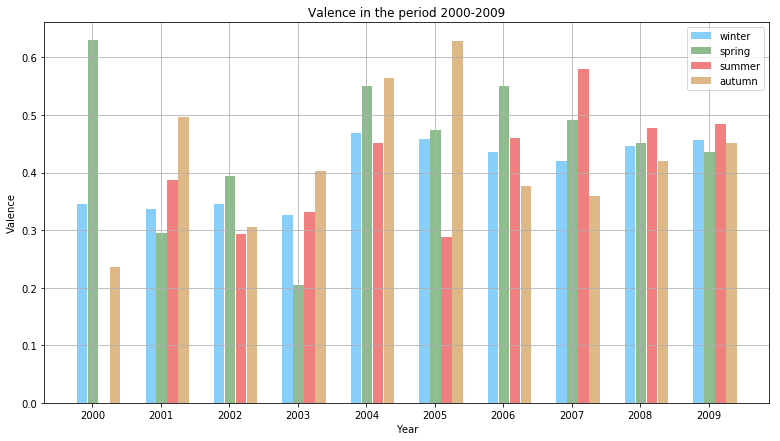

In [38]:
summary_valence_2000=pd.merge(pd.merge(tracks_albums_summer_2000_year_mean_valence,tracks_albums_winter_2000_year_mean_valence , on='year'),
        pd.merge(tracks_albums_spring_2000_year_mean_valence,tracks_albums_autumn_2000_year_mean_valence , on='year'),on='year')
summary_valence_2000.columns=['summer', 'winter', 'spring', 'autumn']
summary_valence_2000

plot_function_seasons(summary_valence_2000,'Valence',period='2000-2009')

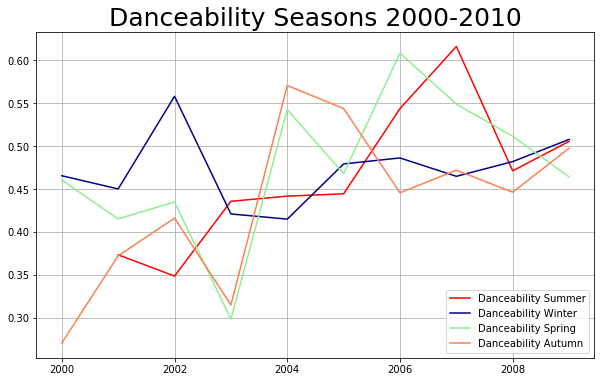

In [39]:
#summer
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('year').mean()
tracks_albums_summer_2000_year_mean_dancebility = tracks_albums_summer_2000_year_mean[['danceability']]

#winter
tracks_albums_winter_2000_year_mean = tracks_albums_winter_2000_year.groupby('year').mean()
tracks_albums_winter_2000_year_mean_dancebility = tracks_albums_winter_2000_year_mean[['danceability']]

#spring
tracks_albums_spring_2000_year_mean = tracks_albums_spring_2000_year.groupby('year').mean()
tracks_albums_spring_2000_year_mean_dancebility = tracks_albums_spring_2000_year_mean[['danceability']]

#autumn
tracks_albums_autumn_2000_year_mean = tracks_albums_autumn_2000_year.groupby('year').mean()
tracks_albums_autumn_2000_year_mean_dancebility = tracks_albums_autumn_2000_year_mean[['danceability']]

def danceability_seasons_00_10():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_2000_year_mean_dancebility["danceability"],
                 color="red", label="Danceability Summer")
    sns.lineplot(data=tracks_albums_winter_2000_year_mean_dancebility["danceability"], 
                 color="darkblue", label="Danceability Winter")
    sns.lineplot(data=tracks_albums_spring_2000_year_mean_dancebility["danceability"],
                 color="lightgreen", label="Danceability Spring")
    return sns.lineplot(data=tracks_albums_autumn_2000_year_mean_dancebility["danceability"],
                        color="coral", label="Danceability Autumn")

std_plot(danceability_seasons_00_10, title='Danceability Seasons 2000-2010')
    

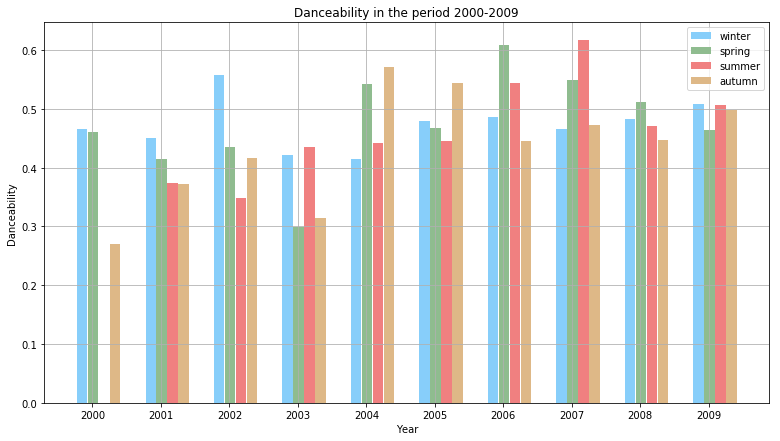

In [40]:
summary_danceability_2000=pd.merge(pd.merge(tracks_albums_summer_2000_year_mean_dancebility,tracks_albums_winter_2000_year_mean_dancebility , on='year'),
        pd.merge(tracks_albums_spring_2000_year_mean_dancebility,tracks_albums_autumn_2000_year_mean_dancebility , on='year'),on='year')
summary_danceability_2000.columns=['summer', 'winter', 'spring', 'autumn']
summary_danceability_2000

plot_function_seasons(summary_danceability_2000,'Danceability',period='2000-2009')

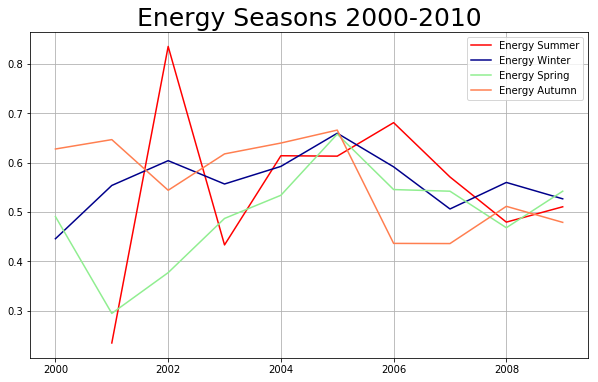

In [41]:
#summer
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('year').mean()
tracks_albums_summer_2000_year_mean_energy = tracks_albums_summer_2000_year_mean[['energy']]

# winter
tracks_albums_winter_2000_year_mean = tracks_albums_winter_2000_year.groupby('year').mean()
tracks_albums_winter_2000_year_mean_energy = tracks_albums_winter_2000_year_mean[['energy']]

#spring
tracks_albums_spring_2000_year_mean = tracks_albums_spring_2000_year.groupby('year').mean()
tracks_albums_spring_2000_year_mean_energy = tracks_albums_spring_2000_year_mean[['energy']]

#autumn
tracks_albums_autumn_2000_year_mean = tracks_albums_autumn_2000_year.groupby('year').mean()
tracks_albums_autumn_2000_year_mean_energy = tracks_albums_autumn_2000_year_mean[['energy']]

def energy_seasons_00_10():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_2000_year_mean_energy["energy"],
                 color="red", label="Energy Summer")
    sns.lineplot(data=tracks_albums_winter_2000_year_mean_energy["energy"],
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_2000_year_mean_energy["energy"],
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_2000_year_mean_energy["energy"], 
                        color="coral", label="Energy Autumn")

std_plot(energy_seasons_00_10, title='Energy Seasons 2000-2010')


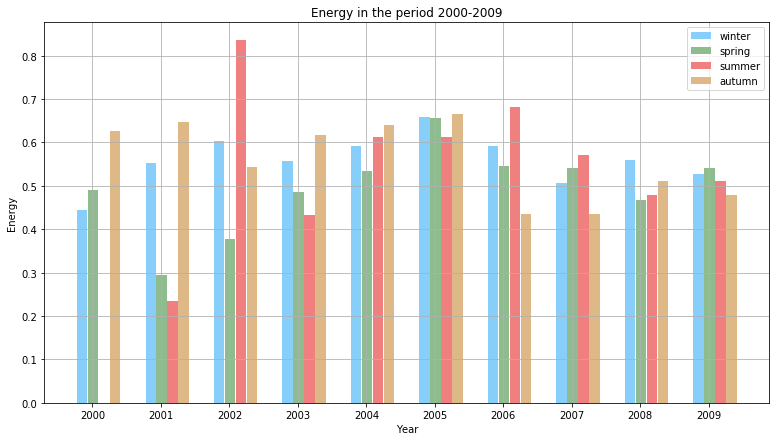

In [42]:
summary_energy_2000=pd.merge(pd.merge(tracks_albums_summer_2000_year_mean_energy,tracks_albums_winter_2000_year_mean_energy , on='year'),
        pd.merge(tracks_albums_spring_2000_year_mean_energy,tracks_albums_autumn_2000_year_mean_energy , on='year'),on='year')
summary_energy_2000.columns=['summer', 'winter', 'spring', 'autumn']
summary_energy_2000

plot_function_seasons(summary_energy_2000,'Energy',period='2000-2009')

## Evolution of music 2010-2018 Valence/Energy/Danceability

In [43]:
#summer
tracks_albums_summer_2010 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <9) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_summer_2010_year = tracks_albums_summer_2010.groupby([(tracks_albums_summer_2010['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_summer_2010['album_date_released'].dt.month.rename('month'))]).mean()

#winter
tracks_albums_winter_2010 = tracks_albums.loc[lambda tracks_albums: ((tracks_albums.album_date_released.dt.month <3)\
                 | (tracks_albums.album_date_released.dt.month >11)) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_winter_2010_year = tracks_albums_winter_2010.groupby([(tracks_albums_winter_2010['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_winter_2010['album_date_released'].dt.month.rename('month'))]).mean()

#spring
tracks_albums_spring_2010 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >2)\
                 & (tracks_albums.album_date_released.dt.month <6) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_spring_2010_year = tracks_albums_spring_2010.groupby([(tracks_albums_spring_2010['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_spring_2010['album_date_released'].dt.month.rename('month'))]).mean()

#autumn
tracks_albums_autumn_2010 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >8)\
                 & (tracks_albums.album_date_released.dt.month <12) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_autumn_2010_year = tracks_albums_autumn_2010.groupby([(tracks_albums_autumn_2010['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_autumn_2010['album_date_released'].dt.month.rename('month'))]).mean()


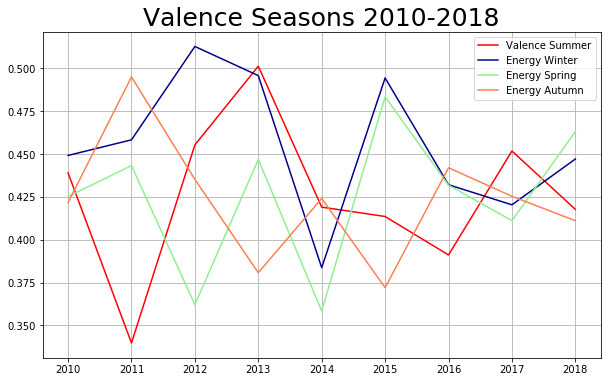

In [44]:
#summer
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('year').mean()
tracks_albums_summer_2010_year_mean_valence = tracks_albums_summer_2010_year_mean[['valence']]

#winter
tracks_albums_winter_2010_year_mean = tracks_albums_winter_2010_year.groupby('year').mean()
tracks_albums_winter_2010_year_mean_valence = tracks_albums_winter_2010_year_mean[['valence']]

#spring
tracks_albums_spring_2010_year_mean = tracks_albums_spring_2010_year.groupby('year').mean()
tracks_albums_spring_2010_year_mean_valence = tracks_albums_spring_2010_year_mean[['valence']]

#autumn
tracks_albums_autumn_2010_year_mean = tracks_albums_autumn_2010_year.groupby('year').mean()
tracks_albums_autumn_2010_year_mean_valence = tracks_albums_autumn_2010_year_mean[['valence']]

def valence_seasons_10_18():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_2010_year_mean_valence["valence"],
                 color="red", label="Valence Summer")
    sns.lineplot(data=tracks_albums_winter_2010_year_mean_valence["valence"], 
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_2010_year_mean_valence["valence"], 
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_2010_year_mean_valence["valence"], 
                        color="coral", label="Energy Autumn")

std_plot(valence_seasons_10_18, title='Valence Seasons 2010-2018')


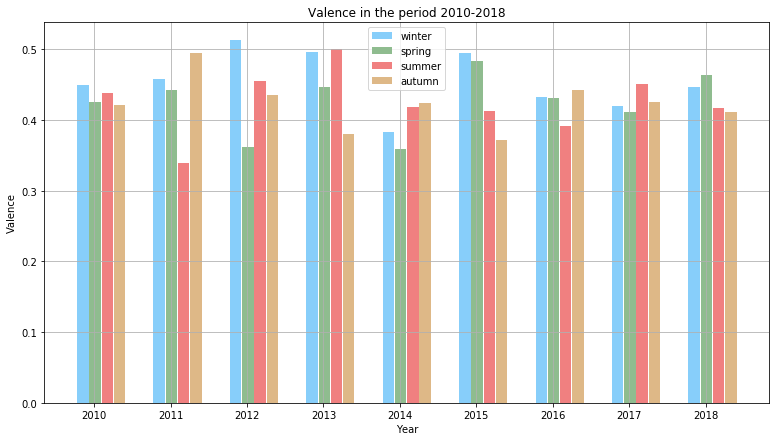

In [45]:
summary_valence_2010=pd.merge(pd.merge(tracks_albums_summer_2010_year_mean_valence,tracks_albums_winter_2010_year_mean_valence , on='year'),
        pd.merge(tracks_albums_spring_2010_year_mean_valence,tracks_albums_autumn_2010_year_mean_valence , on='year'),on='year')
summary_valence_2010.columns=['summer', 'winter', 'spring', 'autumn']
summary_valence_2010

plot_function_seasons(summary_valence_2010,'Valence',period='2010-2018')

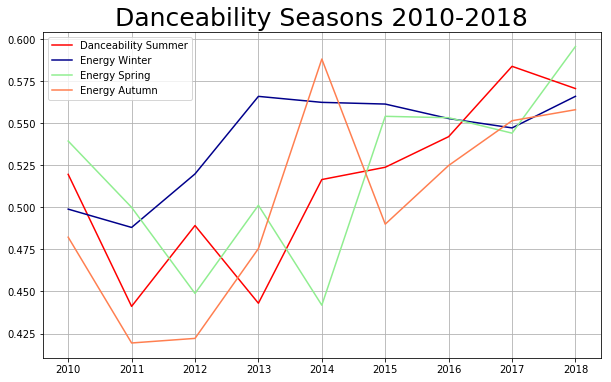

In [46]:
#summer
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('year').mean()
tracks_albums_summer_2010_year_mean_danceability= tracks_albums_summer_2010_year_mean[['danceability']]

#winter
tracks_albums_winter_2010_year_mean = tracks_albums_winter_2010_year.groupby('year').mean()
tracks_albums_winter_2010_year_mean_danceability = tracks_albums_winter_2010_year_mean[['danceability']]

#spring
tracks_albums_spring_2010_year_mean = tracks_albums_spring_2010_year.groupby('year').mean()
tracks_albums_spring_2010_year_mean_danceability = tracks_albums_spring_2010_year_mean[['danceability']]

#autumn
tracks_albums_autumn_2010_year_mean = tracks_albums_autumn_2010_year.groupby('year').mean()
tracks_albums_autumn_2010_year_mean_danceability = tracks_albums_autumn_2010_year_mean[['danceability']]

def danceability_seasons_10_18():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_2010_year_mean_danceability["danceability"],
                 color="red", label="Danceability Summer")
    sns.lineplot(data=tracks_albums_winter_2010_year_mean_danceability["danceability"],
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_2010_year_mean_danceability["danceability"],
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_2010_year_mean_danceability["danceability"],
                        color="coral", label="Energy Autumn")

std_plot(danceability_seasons_10_18, title='Danceability Seasons 2010-2018')


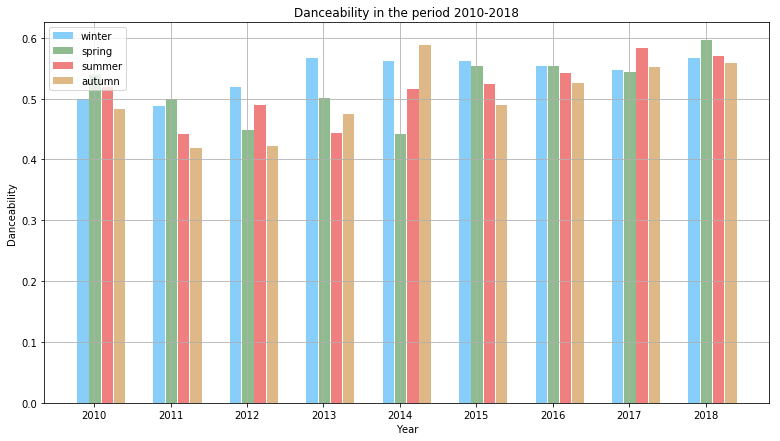

In [47]:
summary_danceability_2010=pd.merge(pd.merge(tracks_albums_summer_2010_year_mean_danceability,tracks_albums_winter_2010_year_mean_danceability , on='year'),
        pd.merge(tracks_albums_spring_2010_year_mean_danceability,tracks_albums_autumn_2010_year_mean_danceability , on='year'),on='year')
summary_danceability_2010.columns=['summer', 'winter', 'spring', 'autumn']
summary_danceability_2010

plot_function_seasons(summary_danceability_2010,'Danceability',period='2010-2018')

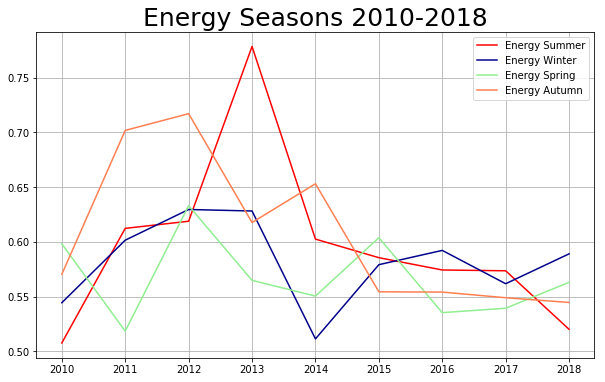

In [48]:
#summer
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('year').mean()
tracks_albums_summer_2010_year_mean_energy = tracks_albums_summer_2010_year_mean[['energy']]

#winter
tracks_albums_winter_2010_year_mean = tracks_albums_winter_2010_year.groupby('year').mean()
tracks_albums_winter_2010_year_mean_energy = tracks_albums_winter_2010_year_mean[['energy']]

#spring
tracks_albums_spring_2010_year_mean = tracks_albums_spring_2010_year.groupby('year').mean()
tracks_albums_spring_2010_year_mean_energy = tracks_albums_spring_2010_year_mean[['energy']]

#autumn
tracks_albums_autumn_2010_year_mean = tracks_albums_autumn_2010_year.groupby('year').mean()
tracks_albums_autumn_2010_year_mean_energy = tracks_albums_autumn_2010_year_mean[['energy']]

def energy_seasons_10_18():
    plt.grid()
    sns.lineplot(data=tracks_albums_summer_2010_year_mean_energy["energy"], 
                 color="red", label="Energy Summer")
    sns.lineplot(data=tracks_albums_winter_2010_year_mean_energy["energy"],
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_2010_year_mean_energy["energy"],
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_2010_year_mean_energy["energy"],
                        color="coral", label="Energy Autumn")

std_plot(energy_seasons_10_18, title='Energy Seasons 2010-2018')


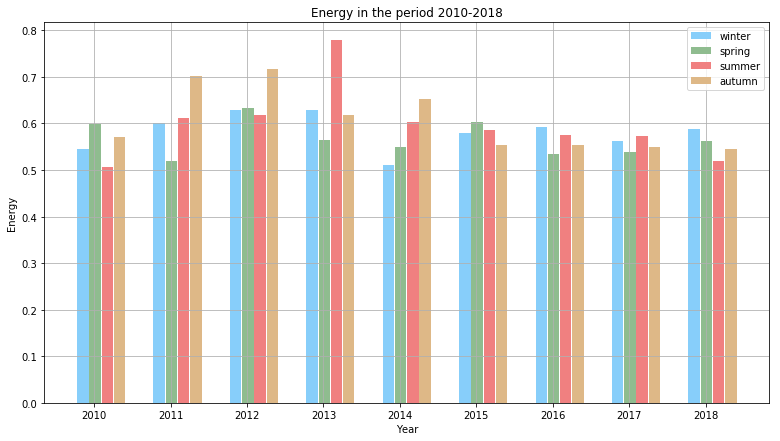

In [49]:
summary_energy_2010=pd.merge(pd.merge(tracks_albums_summer_2010_year_mean_energy,tracks_albums_winter_2010_year_mean_energy , on='year'),
        pd.merge(tracks_albums_spring_2010_year_mean_energy,tracks_albums_autumn_2010_year_mean_energy , on='year'),on='year')
summary_energy_2010.columns=['summer', 'winter', 'spring', 'autumn']
summary_energy_2010

plot_function_seasons(summary_energy_2010,'Energy',period='2010-2018')

In [55]:
alls = tracks_df.merge(track_genre_rel_df).merge(genres_df) \
.merge(albums_df).merge(artists_df)
genres = alls.groupby('genre_parent').mean().sort_values(by='song_hotness',
                                                  ascending=False).head(10)
genres = genres.reset_index()[['genre_id', 'genre_parent']]

a = tracks_df.merge(track_genre_rel_df).merge(genres_df).merge(genres, right_on='genre_parent', left_on='genre_parent') \
        .merge(albums_df).merge(artists_df)
b = a.sort_values(by='song_hotness', ascending=False)
c = b.groupby(['genre_parent', b.album_date_released.dt.year, 'artist_name']).mean()
c.dropna(subset=['song_hotness'])

track_duration  \
genre_parent album_date_released artist_name                                                
Blues        2002.0              Brother JT                                    256.000000   
             2003.0              Eat at Joe's                                  270.000000   
                                 El Jugador                                    183.000000   
                                 The Shut-Ins                                  173.000000   
             2004.0              Kenny Brown                                   259.000000   
                                 Paul "Wine" Jones                             153.400000   
                                 T-Model Ford                                  260.500000   
             2006.0              Nobody's Bizness                              207.125000   
             2007.0              Bombay Laughing Club                          165.000000   
                                 Fit and the Conniptions                       145.750000   
                                 Malty Media                                   334.000000   
                                 Patchwork on the Blues                        296.000000   
             2008.0              Ignatz                                        386.500000   
                                 Navel                                         253.000000   
                                 Wildbirds and Peacedrums                      218.800000   
             2009.0              Dazie Mae                                     227.272727   
                                 Digital Primitives                            327.333333   
                                 Little Howlin' Wolf                           388.000000   
                                 Mattress                                      215.428571   
             2010.0              Cooper-Moore                                  212.000000   
                                 Electric Jellyfish                            319.000000   
                                 Mount Carmel                                  241.800000   
                                 Sound Of Ground                               204.666667   
                                 The Re-Stoned                                 366.285714   
                                 Velcro Lewis Group                            282.000000   
             2011.0              Croxford/Andrews                              281.000000   
                                 Dazie Mae                                     210.000000   
                                 Fit and the Conniptions                       196.583333   
                                 Guitar Lightnin Lee and His Thunder Band      204.333333   
                                 Lantern                                       209.000000   
...                                                                                   ...   
Soul-RnB     2013.0              BJ Block & Dawn Pemberton                     250.875000   
             2015.0              Marcy Playground                                2.849100   
             2016.0              Dionne Warwick                                  2.939775   
                                 El Michels Affair                               3.230490   
                                 John Scofield                                   4.121767   
                                 Sting                                           3.976817   
             2017.0              Chelsea Wolfe                                   4.197846   
                                 Donny Hathaway                                  3.852883   
                                 Godspeed You! Black Emperor                     8.193358   
                                 Heavy D & The Boyz                              4.294000   
                                 Luther Vandross                            

In [56]:
c.sort_values(by='song_hotness', ascending=False, inplace=True)
c.head(100)

track_duration  \
genre_parent   album_date_released artist_name                          
Pop            2018.0              Eminem                    4.855167   
                                   Martin Garrix             3.606983   
                                   David Guetta              3.062500   
               2017.0              Marshmello                3.013700   
International  2016.0              DJ Snake                  3.432433   
Soul-RnB       2018.0              Mac Miller                4.810667   
Instrumental   2017.0              Linkin Park               4.251100   
Country        2017.0              Niall Horan               3.088000   
Pop            2018.0              Halsey                    3.457617   
                                   Monsta X                  3.452883   
Rock           2017.0              Niall Horan               3.730233   
Pop            2016.0              DJ Snake                  3.699217   
Experimental   2017.0              Lila Om                   2.608417   
Pop            2018.0              OMI                       3.014583   
                                   Kiana Ledé                3.706433   
Easy Listening 2017.0              Niall Horan               4.300417   
Pop            2018.0              Drake Bell                3.153850   
Country        2017.0              Blake Shelton             3.660000   
Pop            2018.0              The 1975                  3.386767   
               2017.0              Galantis                  3.188217   
Rock           2017.0              WALK THE MOON             3.275550   
Pop            2018.0              Nina Nesbitt              3.310967   
Spoken         2016.0              J. Cole                   3.484667   
International  2018.0              Cardi B                   4.223167   
Instrumental   2018.0              The Prodigy               2.714917   
Rock           2018.0              The 1975                  3.294517   
Pop            2017.0              Linkin Park               3.391362   
Experimental   2018.0              The 1975                  3.294517   
Pop            2017.0              WALK THE MOON             4.235106   
                                   Niall Horan               3.566681   
...                                                               ...   
                                   Dance Gavin Dance         3.354167   
Rock           2016.0              NateWantsToBattle         1.489133   
Pop            2015.0              Skylar Grey               3.940667   
Instrumental   2017.0              Tame Impala               4.311767   
Pop            2017.0              Milky Chance              3.870217   
Rock           2017.0              LCD Soundsystem           6.115158   
Pop            2015.0              Carly Rae Jepsen          3.214811   
Rock           2017.0              Picture This              4.066433   
Spoken         2017.0              Danny Gonzalez            2.771733   
Rock           2017.0              Day Wave                  4.089767   
Instrumental   2018.0              Christina Aguilera        1.789550   
               2016.0              Petit Biscuit             3.961283   
Rock           2018.0              KT Tunstall               3.681050   
Instrumental   2018.0              2CELLOS                   2.457550   
Pop            2018.0              Christina Aguilera        3.113232   
               2016.0              Selena Gomez              3.644573   
Experimental   2016.0              Kacey Musgraves           2.724829   
Country        2016.0              Kacey Musgraves           2.505217   
Pop            2018.0              Let's Eat Grandma         4.962208   
Rock           2015.0              Fame on Fire              5.012650   
Easy Listening 2016.0              Evanescence               4.117667   
International  2016.0              Las Aves                  3.344667   
               2017.0              Bomba

In [60]:
c.danceability

genre_parent    album_date_released  artist_name                
Pop             2018.0               Eminem                         0.907500
                                     Martin Garrix                  0.506000
                                     David Guetta                   0.659000
                2017.0               Marshmello                     0.520000
International   2016.0               DJ Snake                       0.652000
Soul-RnB        2018.0               Mac Miller                     0.759000
Instrumental    2017.0               Linkin Park                    0.593000
Country         2017.0               Niall Horan                    0.709000
Pop             2018.0               Halsey                         0.445000
                                     Monsta X                       0.613000
Rock            2017.0               Niall Horan                    0.721000
Pop             2016.0               DJ Snake                       0.649500
Experimenta

In [58]:
# tracks_albums_winter_2010 = tracks_albums.loc[lambda tracks_albums: ((tracks_albums.album_date_released.dt.month <3)\
#                  | (tracks_albums.album_date_released.dt.month >11)) \
#                  & (tracks_albums.album_date_released.dt.year >2009)]
test = c.loc[lambda c:(c.album_date_released>2016)]
test

AttributeError: 'DataFrame' object has no attribute 'album_date_released'

In [53]:
c.to_csv('test.csv', encoding='utf-8')